In [1]:
import joblib
import os

train, test = joblib.load("/.cache/ohashi/train_test.pkl")
print(train.shape, test.shape)

(189860, 50, 49) (47465, 50, 49)


In [7]:
import datasets

dataset = datasets.load_dataset(
    "ReonOhashi/RobocupTrajectoryPrediction_8team",
    revision="ab9aaf0feeb14402e112fb1bd94d26dd5d0ba507",
)
dataset = dataset["train"]
train_raw, test_raw = dataset.train_test_split(test_size=0.2, seed=42).values()

  0%|          | 0/50 [00:00<?, ?it/s]

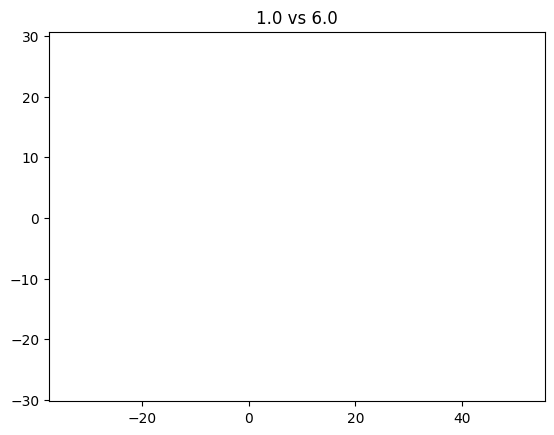

In [5]:
import visualizer

train[0]

visualizer.visualizer_np(test[1])

  0%|          | 0/50 [00:00<?, ?it/s]

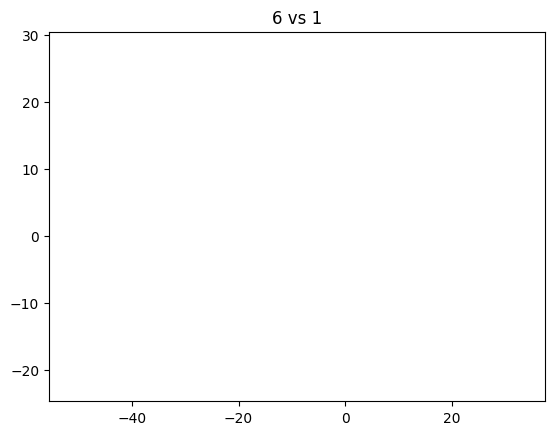

In [15]:
import pandas as pd

visualizer.visualizer_df(pd.DataFrame(test_raw[1]))

  0%|          | 0/50 [00:00<?, ?it/s]

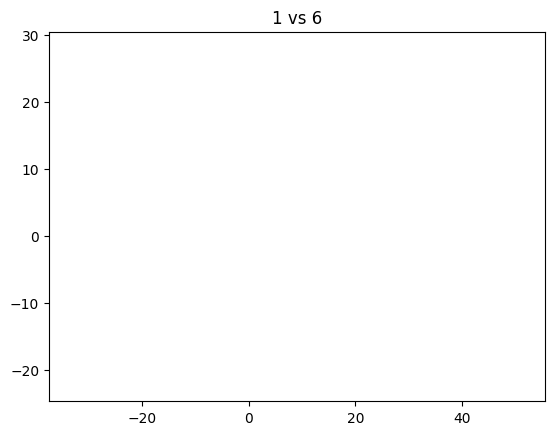

In [17]:
def swap_rl(df):
    """左右のチーム情報を交換"""
    df = df.copy()
    df["l_name"], df["r_name"] = df["r_name"], df["l_name"]

    l_cols = [f"l{i}_x" for i in range(1, 12)] + [f"l{i}_y" for i in range(1, 12)]
    r_cols = [f"r{i}_x" for i in range(1, 12)] + [f"r{i}_y" for i in range(1, 12)]

    df[l_cols], df[r_cols] = df[r_cols].values, df[l_cols].values

    # x座標を反転
    df["b_x"] *= -1
    for i in range(1, 12):
        df[f"l{i}_x"] *= -1
        df[f"r{i}_x"] *= -1

    return df


visualizer.visualizer_df(swap_rl(pd.DataFrame(test_raw[1])))